In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import cycle


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

#class
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from dmba import plotDecisionTree

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import PrecisionRecallDisplay

#score/results
from sklearn.metrics import precision_score, accuracy_score, roc_auc_score, confusion_matrix,f1_score, roc_curve, auc, recall_score

from sklearn.datasets import make_blobs
from sklearn.svm import LinearSVC

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.datasets import make_classification

# from sklearn.metrics import plot_confusion_matrix -> Plot_Confusion_Matrix is deprecated
from sklearn.metrics import ConfusionMatrixDisplay

import tkinter
import matplotlib

In [2]:
def evaluateBinaryClassification(predictions, actuals):
    print("Predictions", predictions)
    print("Actual", actuals)
    contigency = pd.crosstab(actuals,predictions)
    print("Contigency", contigency)
    TP = contigency[1][1]
    TN = contigency[0][0]
    FP = contigency[1][0]
    FN = contigency[0][1]
    n = contigency.sum().sum()

    Acuracy = (TP + TN)/n
    Recall = TP/(TP+FN)
    Precision = TP/(TP+FP)
    FScore = 2*Recall*Precision/(Recall+Precision)
    
    return Acuracy, Recall, Precision, FScore

#Read data

In [3]:
# Read data with a different encoding (Due to the presence of special characters)
df_agg = pd.read_csv('HMAGLOFDB.csv', encoding='latin1')
df_agg.head()

,GF_ID,Year_approx,Year_exact,Month,Day,Lake_name,Glacier_name,GL_ID,LakeDB_ID,G_ID,...,Commerical_damaged,Infra,Agricultural,Hydropower,Econ_damage,Sat_evidence,Ref_scientific,Ref_scientific_full,Ref_other,Remarks
0,1,1533.0,1533.0,NaN,NaN,NaN,Chong Kumden,Ephemeral,NaN,G077657E35156N,...,NaN,NaN,NaN,NaN,NaN,NaN,"(Hedin, 1917; Hewitt, 2014; Bazai et al., 2021)","Hedin, S., 1917. Southern Tibet. Stockholm; 34...",NaN,NaN
1,2,1560.0,1560.0,NaN,NaN,NaN,Machhapuchhre,No lake,NaN,G084009E28557N,...,NaN,NaN,NaN,NaN,NaN,NaN,"(Ives, Shrestha and Mool, 2010; ICIMOD, 2011)","Ives, J.D., Shrestha, R.B., Mool, P.K., 2010. ...",NaN,NaN
2,3,1661.0,1661.0,NaN,NaN,NaN,Biafo,GL075907E35687N,"2, 4",G075593E36006N,...,NaN,Entire village destroyed,NaN,NaN,NaN,NaN,"(Godwin-Austen, 1864)","Godwin-Austen, H.H., 1864. On the Glaciers of ...",NaN,NaN
3,4,1780.0,1780.0,NaN,NaN,NaN,Chong Kumden,Ephemeral,NaN,G077657E35156N,...,NaN,NaN,NaN,NaN,NaN,NaN,"(Strachey, 1853; Bazai et al., 2021)","Strachey, W., 1853. Physical Geography of West...",NaN,Strachey (1853) reported that the oldest flood...
4,6,1833.0,1833.0,NaN,NaN,NaN,Chong Kumden,Ephemeral,NaN,G077657E35156N,...,NaN,NaN,NaN,NaN,NaN,NaN,"(Hewitt and Liu, 2010; Hewitt, 2014; Bazai et ...","Hewitt, K., Liu, J., 2010. Ice-Dammed Lakes an...",NaN,NaN


In [4]:
print(df_agg.columns)

Index(['GF_ID', 'Year_approx', 'Year_exact', 'Month', 'Day', 'Lake_name',
       'Glacier_name', 'GL_ID', 'LakeDB_ID', 'G_ID', 'Lat_lake', 'Lon_lake',
       'Elev_lake', 'Lat_impact', 'Lon_impact', 'Elev_impact', 'Impact_type',
       'Lake_type', 'Transboundary', 'Repeat', 'Region_RGI', 'Region_HiMAP',
       'Country', 'Province', 'River_Basin', 'Driver_lake', 'Driver_GLOF',
       'Mechanism', 'Area', 'Volume', 'Discharge_water', 'Discharge_solid',
       'Impact', 'Lives_total', 'Lives_male', 'Lives_female',
       'Lives_disabilities', 'Injured_total', 'Injured_male', 'Injured_female',
       'Injured_disabilities', 'Displaced_total', 'Displaced_male',
       'Displaced_female', 'Displaced_disabilities', 'Livestock',
       'Residential_destroyed', 'Commerical_destroyed', 'Residential_damaged',
       'Commerical_damaged', 'Infra', 'Agricultural', 'Hydropower',
       'Econ_damage', 'Sat_evidence', 'Ref_scientific', 'Ref_scientific_full',
       'Ref_other', 'Remarks'],
      dty

In [5]:
"""
Data Preprocessing
"""
# Dropping the columns Year_exact, Month, Day
columns_to_drop = ['GF_ID','Year_exact', 'Month', 'Day', 'Lives_male', 'LakeDB_ID', 'G_ID',
'Lives_female', 'Lives_disabilities', 'Injured_total', 'Injured_male', 'Injured_female', 'Injured_disabilities', 'Displaced_total', 'Displaced_male', 'Displaced_female',
'Displaced_disabilities', 'Livestock', 'Residential_destroyed', 'Commerical_destroyed', 'Residential_damaged', 'Commerical_damaged', 'Infra', 'Agricultural', 'Hydropower', 
'Sat_evidence', 'Ref_scientific', 'Ref_scientific_full', 'Ref_other', 'Remarks', 'Region_RGI', 'Region_HiMAP']

"""
Additional Columns that can be dropped
GL_ID', 'LakeDB_ID
Region_RGI
Region_HiMAP
Lives_total
Econ_damage
"""

# Drop the specified columns
df_agg.drop(columns=columns_to_drop, inplace=True)
df_agg.head()

for col in df_agg.columns:
    print(col)

Year_approx
Lake_name
Glacier_name
GL_ID
Lat_lake
Lon_lake
Elev_lake
Lat_impact
Lon_impact
Elev_impact
Impact_type
Lake_type
Transboundary
Repeat
Country
Province
River_Basin
Driver_lake
Driver_GLOF
Mechanism
Area
Volume
Discharge_water
Discharge_solid
Impact
Lives_total
Econ_damage


In [6]:
df_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 703 entries, 0 to 702
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year_approx      555 non-null    float64
 1   Lake_name        312 non-null    object 
 2   Glacier_name     410 non-null    object 
 3   GL_ID            572 non-null    object 
 4   Lat_lake         703 non-null    float64
 5   Lon_lake         703 non-null    float64
 6   Elev_lake        696 non-null    float64
 7   Lat_impact       462 non-null    float64
 8   Lon_impact       462 non-null    float64
 9   Elev_impact      462 non-null    float64
 10  Impact_type      462 non-null    object 
 11  Lake_type        673 non-null    object 
 12  Transboundary    703 non-null    object 
 13  Repeat           703 non-null    object 
 14  Country          703 non-null    object 
 15  Province         487 non-null    object 
 16  River_Basin      657 non-null    object 
 17  Driver_lake     

In [7]:
"""
# Remove the column: But this is an extreme case and should only be used when there are many null values in the column.
# Columns to keep
columns_to_keep = ['Year_approx', 'Lake_type', 'Lat_lake', 'Lon_lake', 'Elev_lake', 'Lake_name', 'Glacier_name', 'Impact_type', 
                   'Transboundary', 'Driver_lake', 'Driver_GLOF', 'Mechanism', 'Area', 'Volume', 'Impact', 
                   'Econ_damage']

# Drop all columns except the ones in columns_to_keep
df_cleaned = df_agg.drop(columns=df_agg.columns.difference(columns_to_keep), inplace=False)

# Now df_cleaned contains only the specified columns
df_cleaned.head()

"""
df_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 703 entries, 0 to 702
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year_approx      555 non-null    float64
 1   Lake_name        312 non-null    object 
 2   Glacier_name     410 non-null    object 
 3   GL_ID            572 non-null    object 
 4   Lat_lake         703 non-null    float64
 5   Lon_lake         703 non-null    float64
 6   Elev_lake        696 non-null    float64
 7   Lat_impact       462 non-null    float64
 8   Lon_impact       462 non-null    float64
 9   Elev_impact      462 non-null    float64
 10  Impact_type      462 non-null    object 
 11  Lake_type        673 non-null    object 
 12  Transboundary    703 non-null    object 
 13  Repeat           703 non-null    object 
 14  Country          703 non-null    object 
 15  Province         487 non-null    object 
 16  River_Basin      657 non-null    object 
 17  Driver_lake     

Year Approx

In [8]:
# Convert the column from string to numeric, leaving NA values unchanged
df_agg['Year_approx'] = pd.to_numeric(df_agg['Year_approx'], errors='coerce')

# Group by 'Country' and calculate the mean year of occurrence
mean_year_by_country = df_agg.groupby('Country')['Year_approx'].mean()

# Iterate over each country and fill missing values with the mean year
for country, mean_year in mean_year_by_country.items():
    # Filter rows for the current country
    country_rows = df_agg[df_agg['Country'] == country]
    
    # Fill missing values with the mean year for the current country
    df_agg.loc[country_rows.index, 'Year_approx'] = country_rows['Year_approx'].fillna(mean_year)


column_name = "Year_approx"

# Count the number of NULL values in the specified column
null_count = df_agg[column_name].isnull().sum()

# Print the number of NULL values
print(f"Number of NULL values in '{column_name}': {null_count}")


Number of NULL values in 'Year_approx': 0


Lake_name

In [9]:
""" 
Filling Using
"Glacier_name": If the lake is associated with a glacier, you can use the name of the glacier to infer the name of the lake.
"Country": If the lake is located in a specific country, you might have information about common lake names in that country, which we can use to fill in the missing values.
"""

# Fill NA values in 'Lake_name' based on 'Glacier_name' and 'Country'
df_agg['Lake_name'] = df_agg.apply(
    lambda row: row['Glacier_name'] if pd.isna(row['Lake_name']) else row['Lake_name'], axis=1)

df_agg['Lake_name'] = df_agg.apply(
    lambda row: f"Unnamed Lake in {row['Country']}" if pd.isna(row['Lake_name']) else row['Lake_name'], axis=1)

# Check if NA values are filled
print("No.of NULL values in Lake_name",df_agg['Lake_name'].isnull().sum())  # Should print 0 if all NA values are filled


No.of NULL values in Lake_name 0


Glacier_name

In [10]:
df_agg['Glacier_name'] = df_agg.apply(
    lambda row: f"Unnamed Glacier in {row['Country']}" if pd.isna(row['Glacier_name']) else row['Glacier_name'], axis=1)

# Check if NA values are filled
print("No.of NULL values in Glacial_name",df_agg['Lake_name'].isnull().sum())  # Should print 0 if all NA values are filled


No.of NULL values in Glacial_name 0


GL_ID

In [11]:
# Group by 'Country' and calculate mode category of 'GL_ID'
mode_gl_id_by_country = df_agg.groupby('Country')['GL_ID'].apply(lambda x: x.mode()[0] if not x.mode().empty else None)

# Fill missing 'GL_ID' values based on mode category of corresponding country
for country, mode_gl_id in mode_gl_id_by_country.items():
    df_agg.loc[df_agg['Country'] == country, 'GL_ID'] = df_agg.loc[df_agg['Country'] == country, 'GL_ID'].fillna(mode_gl_id)

# Check if NA values are filled
print("No.of NULL values in GL_ID",df_agg['GL_ID'].isnull().sum())  # Should print 0 if all NA values are filled

No.of NULL values in GL_ID 0


In [12]:
"""
# Convert the whole dataframe as a string and display
display(df_agg.to_string())

# saving the dataframe
df_agg.to_csv('Transformed.csv')
"""

"\n# Convert the whole dataframe as a string and display\ndisplay(df_agg.to_string())\n\n# saving the dataframe\ndf_agg.to_csv('Transformed.csv')\n"

Lake_type: The type of lake (e.g., moraine dammed, ice dammed) can provide insights into the stability and potential for sudden drainage of the lake, which are critical factors in GLOF occurrence.

In [13]:
# Handling missing values of the lake type: By filling it with mode
unique_Lake_type = df_agg['Lake_type'].unique()
# Print the unique elements
print("Unique elements(Before): ", unique_Lake_type)

# Calculate the mode of the 'Lake_type' column
mode_value = df_agg['Lake_type'].mode()[0]
# Fill NaN values with the mode value
df_agg['Lake_type'] = df_agg['Lake_type'].fillna(mode_value)

unique_Lake_type = df_agg['Lake_type'].unique()
print("Unique elements(After):", unique_Lake_type)



Unique elements(Before):  ['Ice dammed' 'Supraglacial' nan 'Moraine dammed' 'Water pocket'
 'Landslide dammed' 'Bedrock']
Unique elements(After): ['Ice dammed' 'Supraglacial' 'Moraine dammed' 'Water pocket'
 'Landslide dammed' 'Bedrock']


Lat_lake, Lon_lake: The geographical coordinates of the lake can help identify its location within the high mountain region, which is crucial for understanding the context and potential risks associated with GLOF events.

In [14]:
# Handling missing values of the Lat_lake & Lon_lake by finding the average of the coordinates specific to that country

# Now, missing latitude and longitude values are not filled with the average coordinates for each country
print("Null Values(Before): Lat_lake",df_agg['Lat_lake'].isnull().sum(), "Lon_lake",df_agg['Lon_lake'].isnull().sum())

# Group the DataFrame by 'Country' and calculate average coordinates
country_avg_coords = df_agg.groupby('Country')[['Lat_lake', 'Lon_lake']].mean()

# Iterate over each group and fill missing values with the corresponding average coordinates
for country, avg_coords in country_avg_coords.iterrows():
    # Get average coordinates for the current country
    avg_lat = avg_coords['Lat_lake']
    avg_lon = avg_coords['Lon_lake']
    
    # Filter rows for the current country
    country_rows = df_agg[df_agg['Country'] == country]
    
    # Fill missing latitude and longitude values with the corresponding average coordinates
    df_agg.loc[country_rows.index, 'Lat_lake'] = country_rows['Lat_lake'].fillna(avg_lat)
    df_agg.loc[country_rows.index, 'Lon_lake'] = country_rows['Lon_lake'].fillna(avg_lon)

# Now, missing latitude and longitude values are filled with the average coordinates for each country
print("Null Values(After): Lat_lake",df_agg['Lat_lake'].isnull().sum(), "Lon_lake",df_agg['Lon_lake'].isnull().sum())


Null Values(Before): Lat_lake 0 Lon_lake 0
Null Values(After): Lat_lake 0 Lon_lake 0


Elev_lake: The elevation of the lake is important as higher elevation lakes may have different characteristics and risks compared to lower elevation ones. Higher elevation lakes might be more prone to rapid melting and sudden drainage events.

In [15]:

# Now, missing elevation values are not filled with the average coordinates for each country
print("Null Values(Before): Elev_lake",df_agg['Elev_lake'].isnull().sum())

"""
# Group the DataFrame by 'Glacier_name' and calculate average elevation for each glacier
glacier_avg_elev = df_agg.groupby('Glacier_name')[['Elev_lake']].mean()

# Iterate over each glacier and fill missing elevation values
for glacier, avg_elev in glacier_avg_elev.iterrows():
    # Filter rows for the current glacier
    glacier_rows = df_agg[df_agg['Glacier_name'] == glacier]
    
    # Fill missing elevation values with the average elevation for the current glacier
    df_agg.loc[glacier_rows.index, 'Elev_lake'] = glacier_rows['Elev_lake'].fillna(avg_elev)

# Now, missing elevation values are not filled with the average coordinates for each country
print("Null Values(In Between): Elev_lake",df_agg['Elev_lake'].isnull().sum())

# Group the DataFrame by 'Country' and calculate average elevation for each country
country_avg_elev = df_agg.groupby('Country')[['Elev_lake']].mean()

# Iterate over each country and fill missing elevation values
for country, avg_elev in country_avg_elev.iterrows():
    # Filter rows for the current country
    country_rows = df_agg[df_agg['Country'] == country]
    
    # Fill missing elevation values with the average elevation for the current country
    df_agg.loc[country_rows.index, 'Elev_lake'] = country_rows['Elev_lake'].fillna(avg_elev)
"""

""" 
# Group the DataFrame by 'Glacier_name' and calculate average elevation for each glacier
glacier_avg_elevation = df_agg.groupby('Glacier_name')['Elev_lake'].mean()

# Group the DataFrame by 'Country' and calculate average elevation for each country
country_avg_elevation = df_agg.groupby('Country')['Elev_lake'].mean()

# Iterate over each row and fill missing elevation values
for index, row in df_agg.iterrows():
    if pd.isna(row['Elev_lake']):  # Check if elevation value is missing
        if pd.notna(row['Glacier_name']):  # Check if Glacier_name is available
            # Fill missing elevation with average elevation for the corresponding glacier
            df_agg.at[index, 'Elev_lake'] = glacier_avg_elevation[row['Glacier_name']]
        else:
            # Fill missing elevation with average elevation for the corresponding country
            df_agg.at[index, 'Elev_lake'] = country_avg_elevation[row['Country']]

# Now, missing elevation values are filled with the average elevations for each specific glacier or country
"""

# Group the DataFrame by 'Country' and calculate average coordinates
country_avg_elevation = df_agg.groupby('Country')[['Elev_lake']].mean()

# Iterate over each group and fill missing values with the corresponding average coordinates
for country, avg_elev in country_avg_elevation.iterrows():
    # Get average elevation for the current country
    avg_elevation = avg_elev['Elev_lake']
    
    # Filter rows for the current country
    country_rows = df_agg[df_agg['Country'] == country]
    
    # Fill missing latitude and longitude values with the corresponding average coordinates
    df_agg.loc[country_rows.index, 'Elev_lake'] = country_rows['Elev_lake'].fillna(avg_elevation)

# Now, missing elevation values are filled with the average elevations for each specific glacier or country
print("Null Values(After): Elev_lake",df_agg['Elev_lake'].isnull().sum())

Null Values(Before): Elev_lake 7
Null Values(After): Elev_lake 0


In [16]:
""" 
Lat_impact, Lon_impact, Elev_impact
"""
# Group the DataFrame by 'Glacier_name' and calculate average latitude, longitude, and elevation for each glacier
glacier_avg = df_agg.groupby('Glacier_name')[['Lat_impact', 'Lon_impact', 'Elev_impact']].mean()

# Iterate over each glacier and fill missing values with corresponding averages
for glacier, avg_values in glacier_avg.iterrows():
    glacier_rows = df_agg[df_agg['Glacier_name'] == glacier]
    df_agg.loc[glacier_rows.index, 'Lat_impact'] = glacier_rows['Lat_impact'].fillna(avg_values['Lat_impact'])
    df_agg.loc[glacier_rows.index, 'Lon_impact'] = glacier_rows['Lon_impact'].fillna(avg_values['Lon_impact'])
    df_agg.loc[glacier_rows.index, 'Elev_impact'] = glacier_rows['Elev_impact'].fillna(avg_values['Elev_impact'])

# For glaciers with missing names, group the DataFrame by 'Country' and calculate average latitude, longitude, and elevation
country_avg = df_agg.groupby('Country')[['Lat_impact', 'Lon_impact', 'Elev_impact']].mean()

# Iterate over each country and fill missing values with corresponding averages
for country, avg_values in country_avg.iterrows():
    country_rows = df_agg[df_agg['Country'] == country]
    df_agg.loc[country_rows.index, 'Lat_impact'] = country_rows['Lat_impact'].fillna(avg_values['Lat_impact'])
    df_agg.loc[country_rows.index, 'Lon_impact'] = country_rows['Lon_impact'].fillna(avg_values['Lon_impact'])
    df_agg.loc[country_rows.index, 'Elev_impact'] = country_rows['Elev_impact'].fillna(avg_values['Elev_impact'])

print("Null Values(After): Lat_impact",df_agg['Lat_impact'].isnull().sum())
print("Null Values(After): Lon_impact",df_agg['Lon_impact'].isnull().sum())
print("Null Values(After): Elev_impact",df_agg['Elev_impact'].isnull().sum())

Null Values(After): Lat_impact 0
Null Values(After): Lon_impact 0
Null Values(After): Elev_impact 0


Impact_type: Understanding the quality of impact records (e.g., 'Observation' or 'Deposit') can help assess the severity and extent of past GLOF events, which in turn can inform predictions about future occurrences.

In [17]:
# Most of the values in Impact_type are Unknown/NA: So its better to remove the column
df_agg = df_agg.drop('Impact_type', axis=1)


Province

In [18]:



# Handling missing values of the Province: By filling it with mode specific to that country
unique_Province = df_agg['Province'].unique()
# Print the unique elements
print("Unique elements(Before): ", unique_Province)

# Check if NA values are filled
print("No.of NULL values in Province",df_agg['Province'].isnull().sum())  # Should print 0 if all NA values are filled

# # Replace NaN values with "NA" in the 'Province' column
# df_agg['Province'] = df_agg['Province'].fillna("NA")

# # Define a function to fill missing values with mode if mode exists, otherwise fill with "Unknown"
# def fill_with_mode_or_unknown(x):
#     mode_values = x.mode()
#     if not mode_values.empty:
#         return x.fillna(mode_values[0])
#     else:
#         return x.fillna("Unknown")

# # Group by 'Country' and fill missing 'Province' values with the mode of 'Province' within each country
# df_agg['Province'] = df_agg.groupby('Country')['Province'].transform(fill_with_mode_or_unknown)


# Fill NA values in 'Province' based on 'Glacier_name' and 'Country'
df_agg['Province'] = df_agg.apply(
    lambda row: row['Country'] if pd.isna(row['Province']) else row['Province'], axis=1)

# Check if NA values are filled
print("No.of NULL values in Province",df_agg['Province'].isnull().sum())  # Should print 0 if all NA values are filled

unique_Province = df_agg['Province'].unique()
# Print the unique elements
print("Unique elements(After): ", unique_Province)


Unique elements(Before):  ['Ladakh' 'Gandaki' 'Gilgit - Baltistan' nan 'Xinjiang' 'Koshi' 'TAR'
 'Almaty' 'Punakha' 'Kashmir' 'Himachal Pradesh' 'Bagmati' 'Sikkim'
 'Bumthang' 'Gorno-Badakhshan' 'Karnali' 'Khyber Pakhtunkhwa' 'Chitral'
 'Badakhshan' 'Uttarakhand' 'Province No. 1' 'Panjshir' 'Sichuan'
 'Wangduephodrang' 'Kunar' 'Thimphu' 'Arunachal Pradesh']
No.of NULL values in Province 216
No.of NULL values in Province 0
Unique elements(After):  ['Ladakh' 'Gandaki' 'Gilgit - Baltistan' 'Kyrgyzstan' 'Xinjiang'
 'Tajikistan' 'Koshi' 'TAR' 'Almaty' 'Punakha' 'Kazakhstan' 'Kashmir'
 'Himachal Pradesh' 'China' 'Bagmati' 'Sikkim' 'Bumthang'
 'Gorno-Badakhshan' 'Karnali' 'Khyber Pakhtunkhwa' 'Chitral' 'Badakhshan'
 'Uttarakhand' 'Province No. 1' 'Panjshir' 'Sichuan' 'Wangduephodrang'
 'Kunar' 'Thimphu' 'Arunachal Pradesh']


River basin

In [19]:
# Handling missing values of the Province: By filling it with mode specific to that country
River_Basin = df_agg['River_Basin'].unique()
# Print the unique elements
print("Unique elements(Before): ", River_Basin)

# Check if NA values are filled
print("No.of NULL values in River_Basin",df_agg['River_Basin'].isnull().sum())  # Should print 0 if all NA values are filled

# Fill NA values in 'River_Basin' based on 'Glacier_name' and 'Country'
df_agg['River_Basin'] = df_agg.apply(
    lambda row: row['Country'] if pd.isna(row['River_Basin']) else row['River_Basin'], axis=1)

# Check if NA values are filled
print("No.of NULL values in Province",df_agg['River_Basin'].isnull().sum())  # Should print 0 if all NA values are filled

unique_Province = df_agg['River_Basin'].unique()
# Print the unique elements
print("Unique elements(After): ", unique_Province)

Unique elements(Before):  ['Shyok' 'Seti' 'Braldu' 'Hunza' 'Gilgit' 'Alamedin' 'Indus' 'Shigar'
 'Ala Archa' 'Yarkant' 'Bagrot' 'Inylchek' 'Vanch' 'Tamor' 'Shaksgam'
 'Parlung Zangbo' 'Poiqu' 'Amo Chhu' 'Nian Chu' 'Kishi Almaty' 'Bomi'
 'Yalong Tsangpo' nan 'Pho Chhu ' 'Izzyk' 'Gyirong' 'Pumqu'
 'Gongbujiangda/Tangbulang (Nyang) ' 'Nyang' 'Leviy Talgar' 'Kangbuqu'
 'Suo/Xibaxiaqu ' 'Nujiang' 'Kishi Almatinka' 'Srednii Talgar' 'Tong'
 'Nubra' 'Kumbelisu' 'Dudh Koshi' 'Middle Talgar' 'Kaskelen'
 'Luozha Zhangmu' 'Baspa' 'Tanymas' 'Sarykan' 'Shilik' 'Upper Mustang'
 'Hushe' 'Tama Koshi' 'Rongxia' 'Maquan' 'Changme' 'Chamkhar Chhu'
 'Alauddin' 'Shakhdara' 'Nyalam' 'Luozhaxiongqu' 'Humla' 'Chitral'
 'Yarlung Tsangpo' 'Zymdan' 'Cona' 'Bianba' 'Upper Indus' 'Yasin'
 'Sanglich' 'Alaknanda' 'Kargaly' 'Mo Chhu ' 'Arkary' 'Nooruz' 'Arun'
 'Panjshir' 'Ishkoman' 'Yangtze' 'Toguzbulak' 'Chitral ' 'Yigong Zangbo'
 'Ghizer' 'Melamchi' 'Teesta' 'Mangde Chhu' 'Pyanj' 'Shugnan' 'Kunar'
 'Syn Tash' 'Zansk

In [20]:
"""   
Most of the data cells in the column are empty but this feature is important so, adam optimizer can handle the sparse values
"""
# Assuming df_agg is your DataFrame
df_agg['Driver_lake'] = df_agg['Driver_lake'].fillna("Missing")
df_agg['Driver_GLOF'] = df_agg['Driver_GLOF'].fillna("Missing")
df_agg['Mechanism'] = df_agg['Mechanism'].fillna("Missing")

Transboundary: Information about whether the impact of the GLOF is potentially transboundary can help in assessing broader risks and coordinating mitigation efforts across borders.

In [21]:
"""
20  Area             34 non-null     float64
21  Volume           105 non-null    object 
22  Discharge_water  72 non-null     float64
23  Discharge_solid  19 non-null     float64
24  Impact           24 non-null     object 
25  Lives_total      30 non-null     object 
26  Econ_damage      14 non-null     float64

Removing these columns as most of the data is NULL
"""
columns_to_drop = ['Area', 'Volume', 'Discharge_water', 'Discharge_solid', 'Impact', 'Lives_total', 'Econ_damage']
df_agg = df_agg.drop(columns=columns_to_drop, axis=1)


# Mapping dictionary
truth_map = {'Y': 1, 'N': 0}

# Apply mapping to convert 'Transboundary' column values
df_agg['Transboundary'] = df_agg['Transboundary'].map(truth_map)
df_agg['Repeat'] = df_agg['Repeat'].map(truth_map)


In [22]:
column_name = 'Repeat'

# Get a list of column names excluding the one you want to move
other_columns = [col for col in df_agg.columns if col != column_name]

# Reorder the DataFrame with the desired column at the end
df_agg = df_agg[other_columns + [column_name]]

counts = df_agg['Repeat'].value_counts()
print("Target Label", counts)
# saving the data-frame for analysis
df_agg.to_csv('Transformed.csv')

Target Label Repeat
1    416
0    287
Name: count, dtype: int64


***Feature Selection***

In [23]:
"""  
The logic behind using correlation for feature selection is that good variables correlate highly with the target. 
If two variables are correlated, we can predict one from the other. Therefore, if two features are correlated, 
the model only needs one, as the second does not add additional information. 
"""
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# cat_cols is a list of column names containing categorical variables
cat_cols = ['Lake_name', 'Glacier_name', 'GL_ID', 'Lake_type', 'Country', 'Province', 'River_Basin', 'Driver_lake', 'Driver_GLOF', 'Mechanism']

# Encode categorical columns
for col in cat_cols:
    df_agg[col] = label_encoder.fit_transform(df_agg[col].astype(str))

# z scale encoding
# df_agg=(df_agg-df_agg.mean())/df_agg.std()

# Normalize using Min/Max Normalization.
df_agg=(df_agg-df_agg.min())/(df_agg.max()-df_agg.min())

In [24]:
# Drop the 'Repeat' column to get the features (X)
X = df_agg.drop(columns=['Repeat'], axis=1)
X = X.values

# 'Repeat' column is your target variable (Y)
y = df_agg['Repeat'].values

# Split training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [25]:
print(X_train.shape)
print(y_train.shape)


(562, 18)
(562,)


Deep Neural Network Model ------------------------------>

In [26]:
#Train test split
# clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)

from sklearn.neural_network import MLPClassifier

# Ensure that your data (X_train, y_train) is correctly loaded and preprocessed

# Instantiate the MLPClassifier with appropriate parameters
mlp_classifier = MLPClassifier(random_state=1, max_iter=300)

try:
    # Fit the classifier to the training data
    mlp_classifier.fit(X_train, y_train)
    print("Model trained successfully!")
except ValueError as e:
    print("ValueError during training:", e)


Model trained successfully!


/home/pogo/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [27]:
# Deep Neural Network
param_grid = {
    # 'hidden_layer_sizes':[5,10,15,(5,5),(5,10)],
    'hidden_layer_sizes':[(36,72,36), (18, 18, 18), (100, 50, 25), (100,)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['adam'],
    'alpha': [0,0.0005,0.0001,0.0005,0.001],
    'learning_rate':['invscaling', 'adaptive'],
    'learning_rate_init': [0.1,0.0001,0.0005,0.001, 0.005,0.01],
    'max_iter': [5000, 10000],
}

#Using GridSearchCV is computationally expensive so using randomized CV
from sklearn.model_selection import RandomizedSearchCV
mlp_classifier = RandomizedSearchCV(MLPClassifier(random_state=1), param_grid,
                        cv=5,
                        n_iter=10,
                        scoring='recall',
                        refit='recall',
                        verbose=1, error_score='raise')
mlp_classifier.fit(X_train, y_train)

print('Parameters: ', mlp_classifier.best_params_)

# Print the number of output neurons (classes)
print("Number of output neurons:", len(mlp_classifier.classes_))

# Select the best estimator and perform predictions with that model
mlp_classifier = mlp_classifier.best_estimator_

test_accuracy = mlp_classifier.score(X_test, y_test)
print("Accuracy (Unseen Data)", test_accuracy)

mlp_prediction = mlp_classifier.predict(X_test)



Fitting 5 folds for each of 10 candidates, totalling 50 fits
Parameters:  {'solver': 'adam', 'max_iter': 5000, 'learning_rate_init': 0.005, 'learning_rate': 'invscaling', 'hidden_layer_sizes': (100,), 'alpha': 0.0001, 'activation': 'relu'}
Number of output neurons: 2
Accuracy (Unseen Data) 0.9290780141843972


Confusion Matrix:
 [[47  3]
 [ 7 84]]
Accuracy:         0.9290780141843972
Recall Score:     0.9230769230769231
Precision Score:  0.9655172413793104
F1 Score:         0.9438202247191013
ROC_AUC Score:    0.9315384615384615


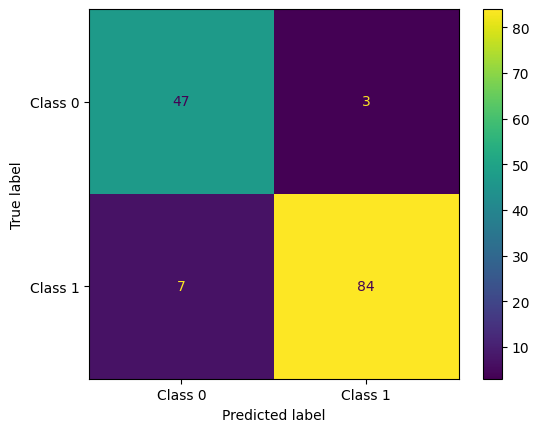

In [28]:
#score
from sklearn.metrics import precision_score, accuracy_score, roc_auc_score, confusion_matrix,f1_score, roc_curve, auc, recall_score

# AFTER CV 
print("Confusion Matrix:\n", confusion_matrix(y_test, mlp_prediction))
print("Accuracy:        ", accuracy_score(y_test, mlp_prediction))
print("Recall Score:    ", recall_score(y_test, mlp_prediction, zero_division=1))     
print("Precision Score: ",precision_score(y_test, mlp_prediction, zero_division=1))
print("F1 Score:        ", f1_score(y_test, mlp_prediction,zero_division=1))
print("ROC_AUC Score:   ",roc_auc_score(y_test,mlp_prediction,multi_class='ovr'))



cm = confusion_matrix(y_test, mlp_prediction)
# Create an instance of the ConfusionMatrixDisplay class
cmd = ConfusionMatrixDisplay(cm, display_labels=['Class 0', 'Class 1'])
# Call the plot() method of the ConfusionMatrixDisplay object to display the confusion matrix
cmd.plot()

# plot_confusion_matrix(clf, X_test, y_test)  
plt.show()


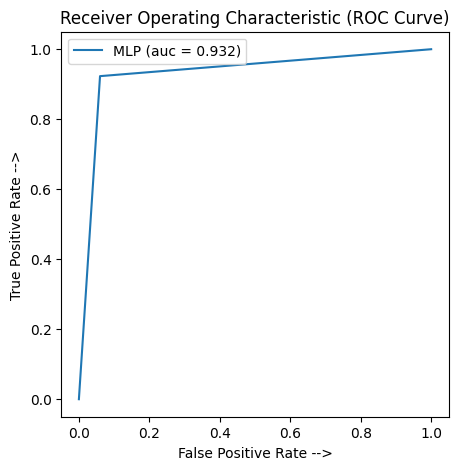

In [29]:
dnn_fpr, dnn_tpr, threshold = roc_curve(y_test, mlp_prediction)
auc = auc(dnn_fpr, dnn_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(dnn_fpr, dnn_tpr, linestyle='-', label='MLP (auc = %0.3f)' % auc)
plt.title("Receiver Operating Characteristic (ROC Curve)")
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()
plt.show()

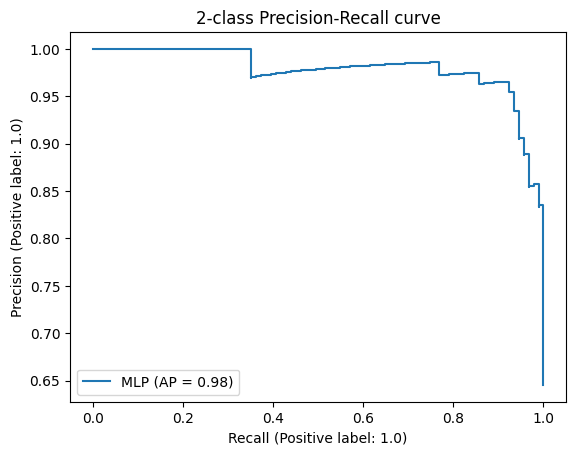

In [30]:
#AP = Average precision
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    mlp_classifier, X_test, y_test, name="MLP"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

Support Vector Machine -------------------------------------->

In [31]:
# Support Vector machine
from sklearn.model_selection import GridSearchCV
from sklearn import svm

# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
            'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 'auto'], 
            'kernel': ['rbf', 'linear', 'poly'],
            'degree': [2, 3, 4],  # Degree of the polynomial kernel function ('poly')
            'coef0': [0.0, 1.0]  # Independent term in the polynomial kernel function and 'sigmoid'
            }  

svm_classifier = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3).fit(X_train, y_train) 

# Select the best estimator and perform predictions with that model
svm_classifier = svm_classifier.best_estimator_
svm_prediction = svm_classifier.predict(X_test)


Fitting 5 folds for each of 540 candidates, totalling 2700 fits
[CV 1/5] END C=0.1, coef0=0.0, degree=2, gamma=1, kernel=rbf;, score=0.867 total time=   0.0s
[CV 2/5] END C=0.1, coef0=0.0, degree=2, gamma=1, kernel=rbf;, score=0.850 total time=   0.0s
[CV 3/5] END C=0.1, coef0=0.0, degree=2, gamma=1, kernel=rbf;, score=0.848 total time=   0.0s
[CV 4/5] END C=0.1, coef0=0.0, degree=2, gamma=1, kernel=rbf;, score=0.902 total time=   0.0s
[CV 5/5] END C=0.1, coef0=0.0, degree=2, gamma=1, kernel=rbf;, score=0.866 total time=   0.0s
[CV 1/5] END C=0.1, coef0=0.0, degree=2, gamma=1, kernel=linear;, score=0.867 total time=   0.0s
[CV 2/5] END C=0.1, coef0=0.0, degree=2, gamma=1, kernel=linear;, score=0.841 total time=   0.0s
[CV 3/5] END C=0.1, coef0=0.0, degree=2, gamma=1, kernel=linear;, score=0.821 total time=   0.0s
[CV 4/5] END C=0.1, coef0=0.0, degree=2, gamma=1, kernel=linear;, score=0.884 total time=   0.0s
[CV 5/5] END C=0.1, coef0=0.0, degree=2, gamma=1, kernel=linear;, score=0.839 

Confusion Matrix:
 [[40 10]
 [ 5 86]]
Accuracy:         0.8936170212765957
Recall Score:     0.945054945054945
Precision Score:  0.8958333333333334
F1 Score:         0.9197860962566845
ROC_AUC Score:    0.8725274725274725


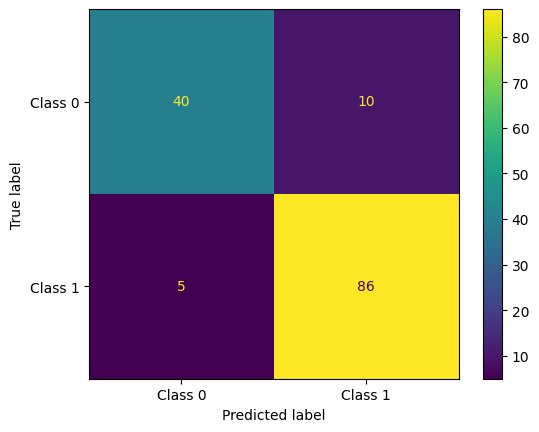

In [32]:
# AFTER CV 
print("Confusion Matrix:\n", confusion_matrix(y_test, svm_prediction))
print("Accuracy:        ", accuracy_score(y_test, svm_prediction))
print("Recall Score:    ", recall_score(y_test, svm_prediction, zero_division=1))     
print("Precision Score: ",precision_score(y_test, svm_prediction, zero_division=1))
print("F1 Score:        ", f1_score(y_test, svm_prediction,zero_division=1))
print("ROC_AUC Score:   ",roc_auc_score(y_test,svm_prediction,multi_class='ovr'))


cm = confusion_matrix(y_test, svm_prediction)
# Create an instance of the ConfusionMatrixDisplay class
cmd = ConfusionMatrixDisplay(cm, display_labels=['Class 0', 'Class 1'])
# Call the plot() method of the ConfusionMatrixDisplay object to display the confusion matrix
cmd.plot()

# plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

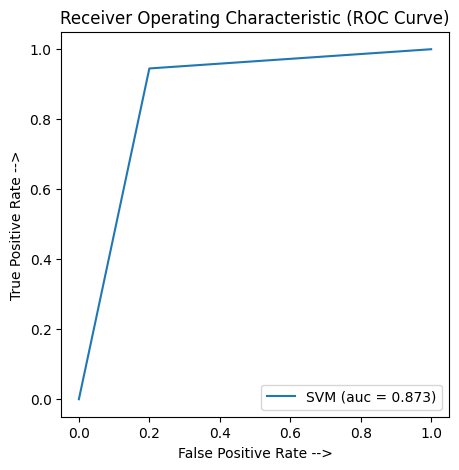

In [33]:
svm_fpr, svm_tpr, threshold = roc_curve(y_test, svm_prediction)

from sklearn.metrics import precision_score, accuracy_score, roc_auc_score, confusion_matrix,f1_score, roc_curve, auc, recall_score
auc_svm = auc(svm_fpr, svm_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc = %0.3f)' % auc_svm)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.title("Receiver Operating Characteristic (ROC Curve)")
plt.legend()
plt.show()


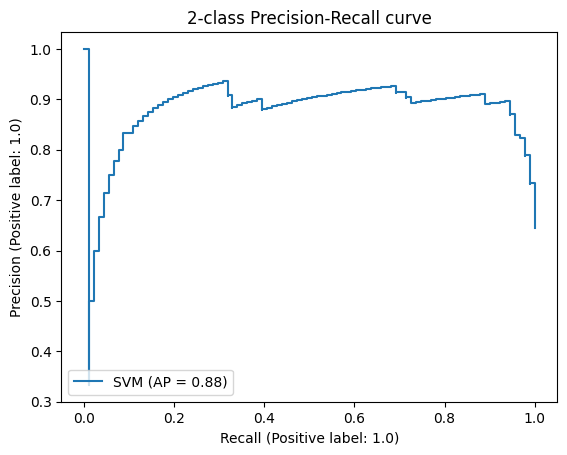

In [34]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    svm_classifier, X_test, y_test, name="SVM"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

Kth Nearest Neighbors -------------------------->

In [35]:
from sklearn.model_selection import GridSearchCV

k_range = [_ for _ in range(1, 31)]

param_grid = {
    'n_neighbors': k_range,
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]  # Manhattan and Euclidean distances
}

knn_classifier = KNeighborsClassifier()
knn_classifier = GridSearchCV(knn_classifier, param_grid, cv=10, scoring='recall', return_train_score=False, verbose=1)
# fitting the model for grid search
knn_classifier = knn_classifier.fit(X_train, y_train)
print("Optimized parameters", knn_classifier.best_params_)

# Select the best estimator and perform predictions with that model
knn_classifier = knn_classifier.best_estimator_
knn_prediction = knn_classifier.predict(X_test)

Fitting 10 folds for each of 480 candidates, totalling 4800 fits
Optimized parameters {'algorithm': 'auto', 'n_neighbors': 5, 'p': 2, 'weights': 'distance'}


Confusion Matrix:
 [[41  9]
 [ 6 85]]
Accuracy:         0.8936170212765957
Recall Score:     0.9340659340659341
Precision Score:  0.9042553191489362
F1 Score:         0.918918918918919
ROC_AUC Score:    0.8770329670329672


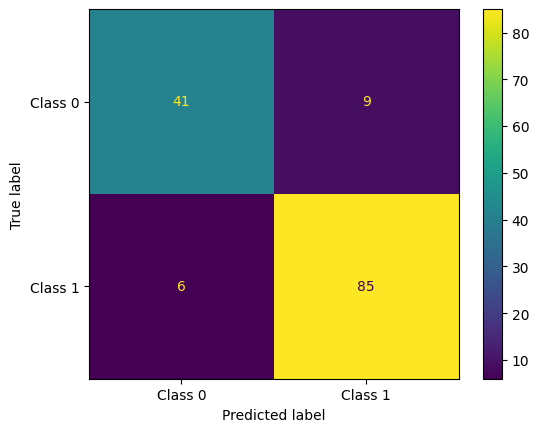

In [36]:
# AFTER CV 
print("Confusion Matrix:\n", confusion_matrix(y_test, knn_prediction))
print("Accuracy:        ", accuracy_score(y_test, knn_prediction))
print("Recall Score:    ", recall_score(y_test, knn_prediction, zero_division=1))     
print("Precision Score: ",precision_score(y_test, knn_prediction, zero_division=1))
print("F1 Score:        ", f1_score(y_test, knn_prediction,zero_division=1))
print("ROC_AUC Score:   ",roc_auc_score(y_test,knn_prediction,multi_class='ovr'))


cm = confusion_matrix(y_test, knn_prediction)
# Create an instance of the ConfusionMatrixDisplay class
cmd = ConfusionMatrixDisplay(cm, display_labels=['Class 0', 'Class 1'])
# Call the plot() method of the ConfusionMatrixDisplay object to display the confusion matrix
cmd.plot()

# plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

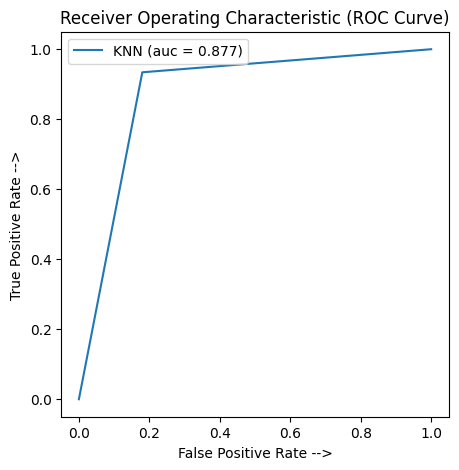

In [37]:
knn_fpr, knn_tpr, threshold = roc_curve(y_test, knn_prediction)
auc_knn = auc(knn_fpr, knn_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(knn_fpr, knn_tpr, linestyle='-', label='KNN (auc = %0.3f)' % auc_knn)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.title("Receiver Operating Characteristic (ROC Curve)")
plt.legend()
plt.show()


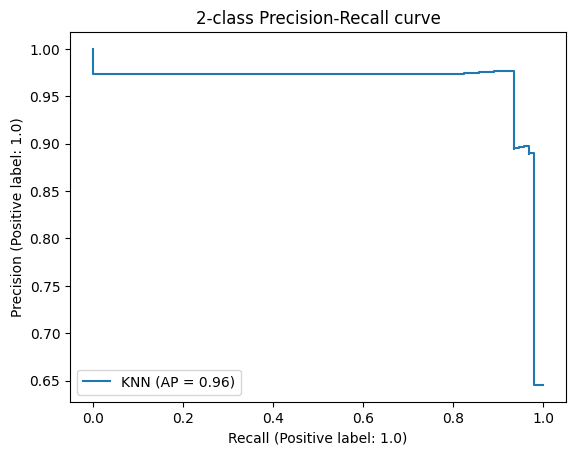

In [38]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    knn_classifier, X_test, y_test, name="KNN"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

*Ensemble Methods*
1. Bagging
https://stackoverflow.com/questions/67336344/an-baggingclassifier-manually-define-multiple-base-estimator-in-sklearn

You can only pass one estimator to base_estimator. The whole idea behind BaggingBlassifier is to train one model on random samples of the training data in an attempt to reduce its variance.

If you need two or more estimators, each one of them trained on random subsets of data, I suggest two different options:

Create your own voting process from two separate bagging classifiers
Train two different BaggingClassifiers and pass them to sklearn.ensemble.StackingClassifier.
Share
Improve this answer


In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.classifier import StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.ensemble import BaggingClassifier
# Create a Bagging Classifier with base models

# Creating a BaggingClassifier with multiple base estimators is not possible so instead use bagging on individual base models and use the bagging model for stacking the results
bagging_model1 = BaggingClassifier(base_estimator=svm_classifier, random_state=42)
# Train the Bagging Classifier
bagging_model1.fit(X_train, y_train)
# Evaluate the Bagging Classifier
accuracy = bagging_model1.score(X_test, y_test)
print("Bagging Classifier Accuracy:(SVM)", accuracy)
bagging1_pred_test = bagging_model1.predict(X_test)

# KNN
bagging_model2 = BaggingClassifier(base_estimator=knn_classifier, random_state=42)
# Train the Bagging Classifier
bagging_model2.fit(X_train, y_train)
# Evaluate the Bagging Classifier
accuracy = bagging_model2.score(X_test, y_test)
print("Bagging Classifier Accuracy:(KNN)", accuracy)
bagging2_pred_test = bagging_model2.predict(X_test)

# Creating a BaggingClassifier with multiple base estimators is not possible so instead use bagging on individual base models and use the bagging model for stacking the results
bagging_model3 = BaggingClassifier(base_estimator=mlp_classifier, random_state=42)
# Train the Bagging Classifier
bagging_model3.fit(X_train, y_train)
# Evaluate the Bagging Classifier
accuracy = bagging_model3.score(X_test, y_test)
print("Bagging Classifier Accuracy:", accuracy)
bagging3_pred_test = bagging_model3.predict(X_test)


/home/pogo/.local/lib/python3.10/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging Classifier Accuracy:(SVM) 0.900709219858156
Bagging Classifier Accuracy:(KNN) 0.900709219858156


/home/pogo/.local/lib/python3.10/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/pogo/.local/lib/python3.10/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging Classifier Accuracy: 0.9290780141843972


In [49]:
lr = LogisticRegression()  # Defining the meta classifier, Set probability=True
clf_stack = StackingClassifier(classifiers =[bagging_model1, bagging_model2, bagging_model3], meta_classifier = lr, use_probas = False, use_features_in_secondary = False)
model_stack = clf_stack.fit(X_train, y_train) # training of stacked model
stacking_pred_test = model_stack.predict(X_test)	 # predictions on test data using stacked model


acc_stack = accuracy_score(y_test, stacking_pred_test)  # evaluating accuracy
print('accuracy score of Stacked model:', acc_stack * 100)

/home/pogo/.local/lib/python3.10/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/pogo/.local/lib/python3.10/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/pogo/.local/lib/python3.10/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


accuracy score of Stacked model: 92.19858156028369


Confusion Matrix:
 [[44  6]
 [ 5 86]]
Accuracy:         0.9219858156028369
Recall Score:     0.945054945054945
Precision Score:  0.9347826086956522
F1 Score:         0.9398907103825138
ROC_AUC Score:    0.9125274725274725


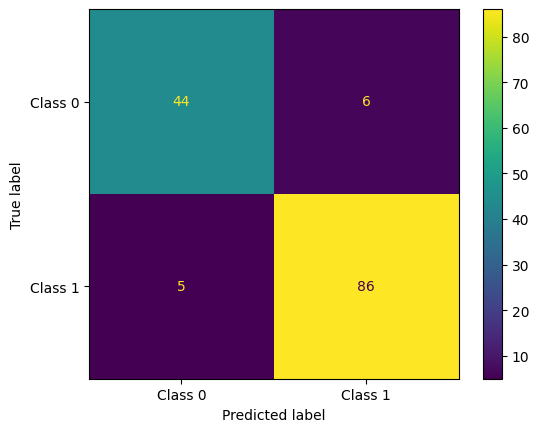

In [50]:
#score
from sklearn.metrics import precision_score, accuracy_score, roc_auc_score, confusion_matrix,f1_score, roc_curve, auc, recall_score

# AFTER CV 
print("Confusion Matrix:\n", confusion_matrix(y_test, stacking_pred_test))
print("Accuracy:        ", accuracy_score(y_test, stacking_pred_test))
print("Recall Score:    ", recall_score(y_test, stacking_pred_test, zero_division=1))     
print("Precision Score: ",precision_score(y_test, stacking_pred_test, zero_division=1))
print("F1 Score:        ", f1_score(y_test, stacking_pred_test,zero_division=1))
print("ROC_AUC Score:   ",roc_auc_score(y_test,stacking_pred_test,multi_class='ovr'))



cm = confusion_matrix(y_test, stacking_pred_test)
# Create an instance of the ConfusionMatrixDisplay class
cmd = ConfusionMatrixDisplay(cm, display_labels=['Class 0', 'Class 1'])
# Call the plot() method of the ConfusionMatrixDisplay object to display the confusion matrix
cmd.plot()

# plot_confusion_matrix(clf, X_test, y_test)  
plt.show()


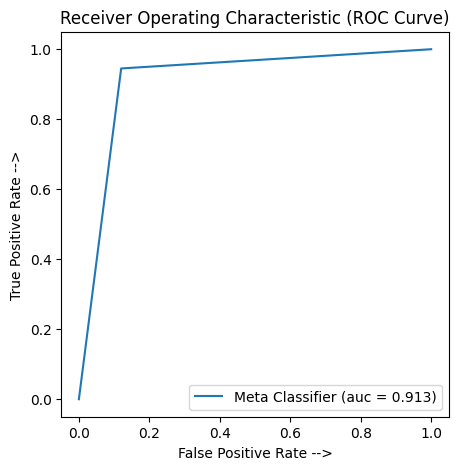

In [51]:
stacking_fpr, stacking_tpr, threshold = roc_curve(y_test, stacking_pred_test)
auc = auc(stacking_fpr, stacking_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(stacking_fpr, stacking_tpr, linestyle='-', label='Meta Classifier (auc = %0.3f)' % auc)
plt.title("Receiver Operating Characteristic (ROC Curve)")
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()
plt.show()

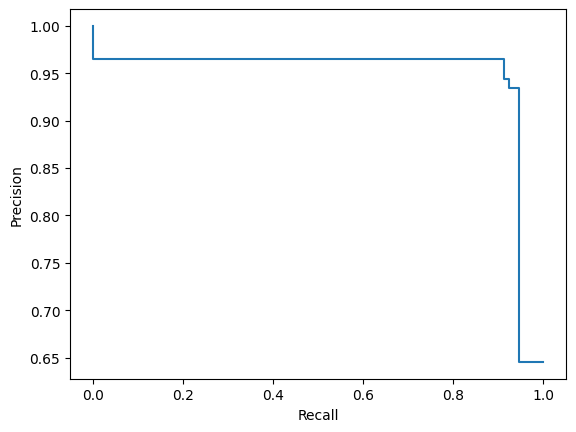

In [52]:
# #AP = Average precision
# from sklearn.metrics import PrecisionRecallDisplay

# display = PrecisionRecallDisplay.from_estimator(
#     model_stack, X_test, y_test, name="MLP"
# )
# _ = display.ax_.set_title("2-class Precision-Recall curve")


from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

# Predict probabilities instead of class labels
y_proba = model_stack.predict_proba(X_test)

# Extract probabilities for the positive class
y_proba_positive_class = y_proba[:, 1]

# Calculate precision and recall
precision, recall, _ = precision_recall_curve(y_test, y_proba_positive_class)

# Plot precision-recall curve
display = PrecisionRecallDisplay(precision=precision, recall=recall).plot()
